In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [3]:
import matplotlib.pyplot as plt

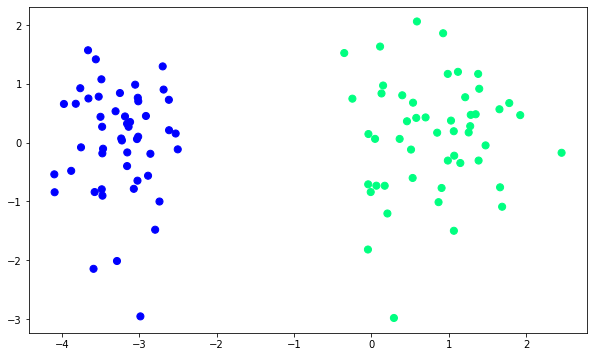

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c = y, cmap='winter', s= 50)

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X, y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [6]:
print(lor.intercept_)
print(lor.coef_)

[5.84949868]
[[4.87845837 0.23011351]]


In [7]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [21]:
def gd(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights - lr * (np.dot((y - y_hat), X)/ X.shape[0])
        
    return weights[1:], weights[0]


def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
coef_, intercept_ = gd(X, y)

In [24]:
m1 = -(coef_[0]/coef_[1])
b1 = -(intercept_/coef_[1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

(-3.0, 2.0)

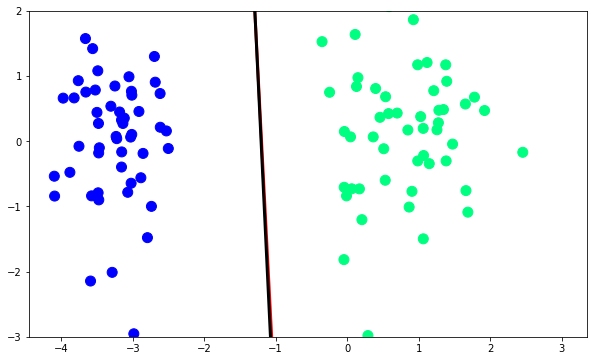

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)